<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/ML2/ML2_INN_Full_code_Learner_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
    <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>

<center><img src="https://img.freepik.com/free-photo/luxury-bedroom-suite-resort-high-rise-hotel-with-working-table_105762-1783.jpg?w=740&t=st=1654505493~exp=1654506093~hmac=fc1167df2b3797e32400448b458fd80afb85e31403c7689e0b1506023ff754a7" width="720"></center>



<center><font size=6>Hotel Booking Cancellation Prediction</font></center>

## Problem Statement

### Context

Many hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which benefits hotel guests. Still, it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.


The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing the necessary libraries

In [65]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Import librarires for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import libraries for Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#import libraries for SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [66]:
# Read the data into a dataframe and view the first 10 rows
df = pd.read_csv('INNHotelsGroup.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [67]:
# Create a copy of the data so to avoiding editing the original data and view the first 5 rows
data = df.copy()

data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Overview

* Observations
* Sanity checks

In [68]:
#Display the first and last 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [69]:
#Check the columns data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There seems to be no missing values in the data
* There are 19 columns 5 of which are of object type and the rest are numerical

In [70]:
#Print the number of columns and rows
print("The data has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The data has 36275 rows and 19 columns


In [71]:
#Check the description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [72]:
#Check the description of object features
data.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [73]:
#MISSING VALUES

# Calculate missing values information
missing_info = data.isnull().agg(['sum', lambda x: (x.sum() / len(x)) * 100])

# Transpose and rename columns
missing_info = missing_info.T.rename(
    columns={'sum': 'Missing Value Count', '': 'Missing Value Percentage'}
)

# Reset index to make 'variable' a column
missing_info = missing_info.reset_index().rename(columns={'index': 'Variable'})

# Display the result
missing_info

,Variable,Missing Value Count,<lambda>
0,Booking_ID,0.0,0.0
1,no_of_adults,0.0,0.0
2,no_of_children,0.0,0.0
3,no_of_weekend_nights,0.0,0.0
4,no_of_week_nights,0.0,0.0
5,type_of_meal_plan,0.0,0.0
6,required_car_parking_space,0.0,0.0
7,room_type_reserved,0.0,0.0
8,lead_time,0.0,0.0
9,arrival_year,0.0,0.0


* There are no missing values in the data

In [74]:
#  It prints the objects unique values and their counts for each column.
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Booking_ID are :
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
           ..
INN00008    1
INN00007    1
INN00006    1
INN00005    1
INN00004    1
Name: count, Length: 36275, dtype: int64
**************************************************
Unique values in type_of_meal_plan are :
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
Unique values in room_type_reserved are :
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
Unique values in market_segment_type are :
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: in

In [75]:
# Check uniqueness of values for each feature
data.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


* All object types will be made categorical

In [76]:
#Drop the features, BOOKING_ID, CustomerId and Surname
data.drop('Booking_ID', axis=1, inplace=True)

* The Booking_ID column was dropped because it has no significant analytical value in our problem

In [77]:
# Display the data without the Booking_ID column
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [78]:
#Convert object data types to categorical
data['type_of_meal_plan'] = data['type_of_meal_plan'].astype('category')
data['room_type_reserved'] = data['room_type_reserved'].astype('category')
data['market_segment_type'] = data['market_segment_type'].astype('category')
data['booking_status'] = data['booking_status'].astype('category')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

EDA Questions:
* What are the busiest months in the hotel?
* Which market segment do most of the guests come from?
* Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
* What percentage of bookings are canceled?
* Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
* Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Note: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

In [80]:
# A function that takes a dataframe and a continuous variable and displays a histogram with a kde line and a box plot for the variable
def univariate_analysis_continous(df, var):
    plt.figure(figsize=(10, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=var)
    plt.title(f'Box plot of {var}')

    plt.tight_layout()
    plt.show()

In [81]:
# A function that takes a dataframe and a categorical variable and displays two appropriate visuals for the variable for EDA
def univariate_analysis_categorical(df, var):
    plt.figure(figsize=(12, 5))

    # Count plot
    #plt.subplot(1, 2, 1)
    ax = sns.countplot(data=df, x=var, palette='viridis')
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=45, ha='right')

    # Add count numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

### Univariate Analysis

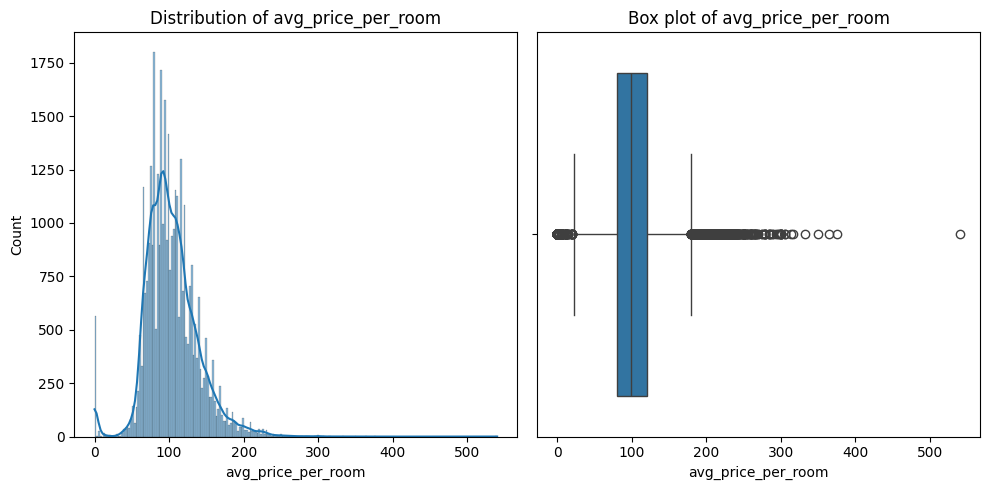

In [82]:
univariate_analysis_continous(data, 'avg_price_per_room')

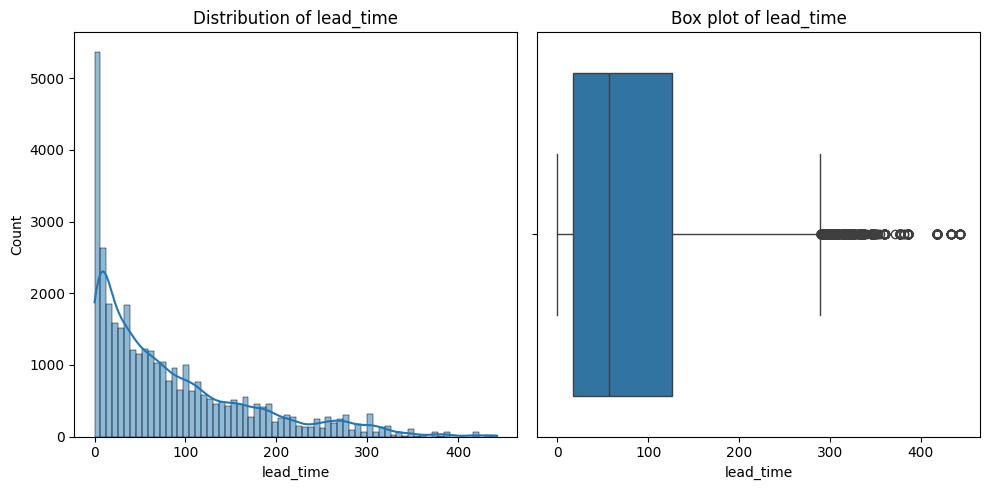

In [83]:
univariate_analysis_continous(data, 'lead_time')

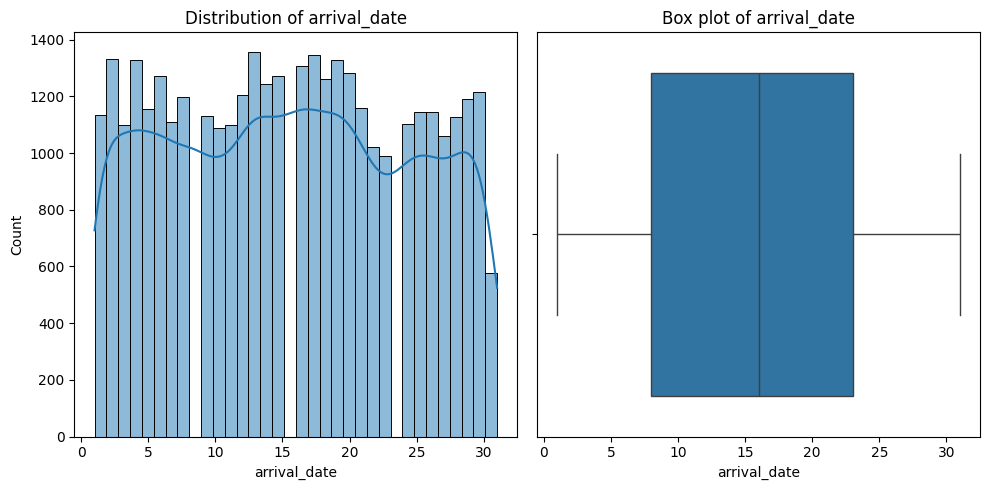

In [84]:
univariate_analysis_continous(data, 'arrival_date')

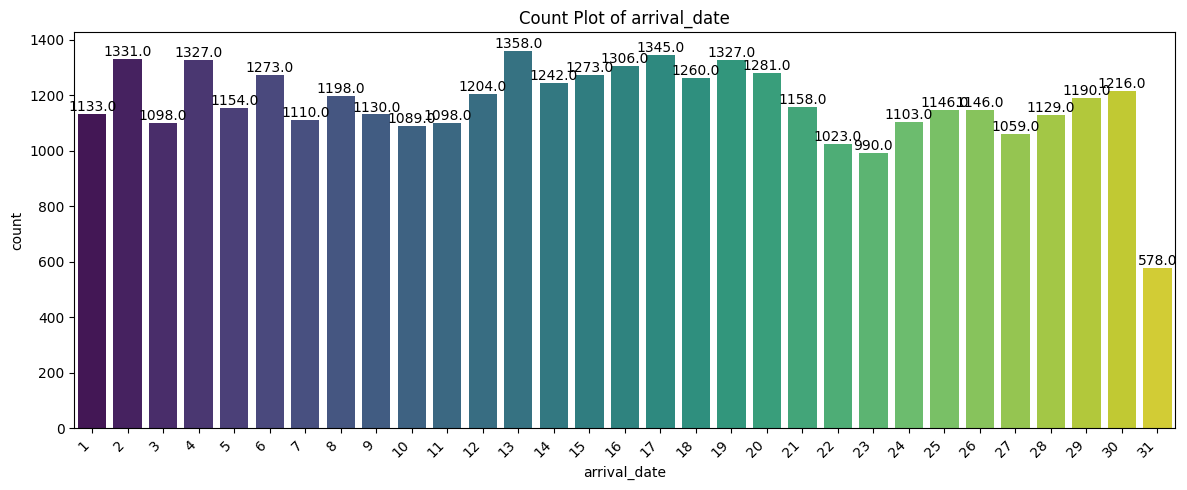

In [85]:
univariate_analysis_categorical(data, 'arrival_date')

* Generally the arrival date (date of the month) is similar on all the days of the month
*
* The 31st is the day with the least number of arrivals

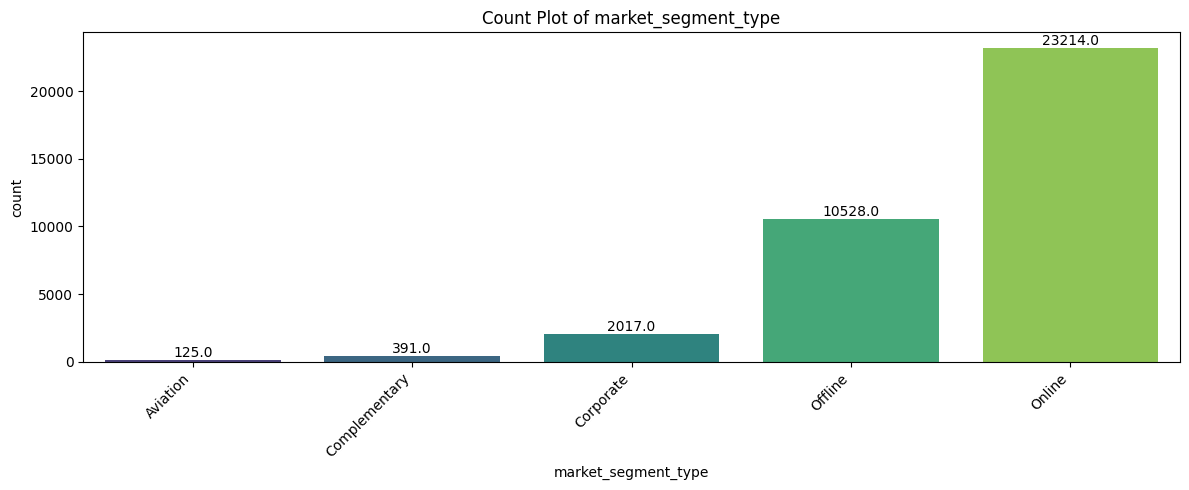

In [86]:
univariate_analysis_categorical(data, 'market_segment_type')

* People come from the online segment more than the rest of the segment types

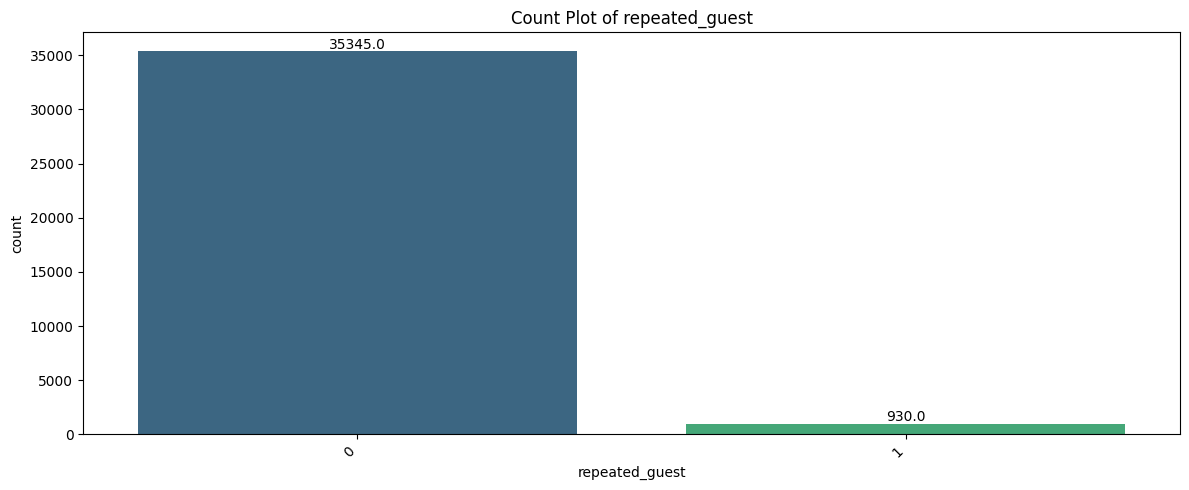

In [87]:
univariate_analysis_categorical(data, 'repeated_guest')

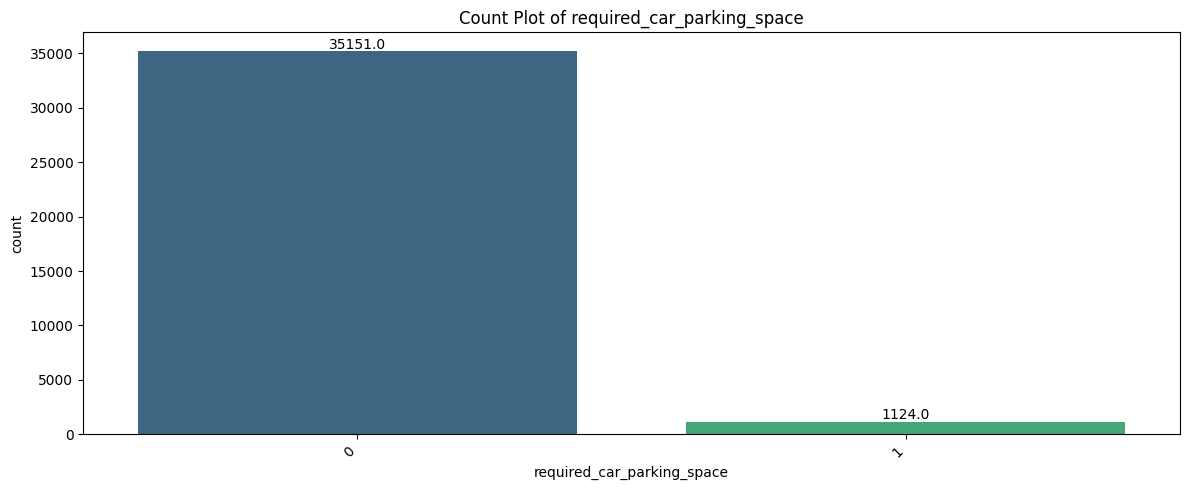

In [88]:
univariate_analysis_categorical(data, 'required_car_parking_space')

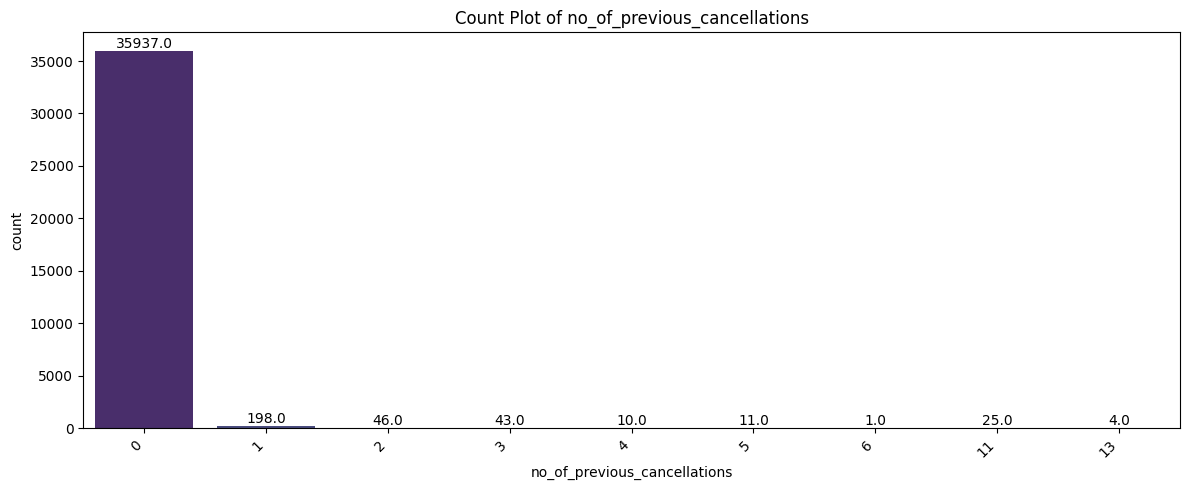

In [89]:
univariate_analysis_categorical(data, 'no_of_previous_cancellations')

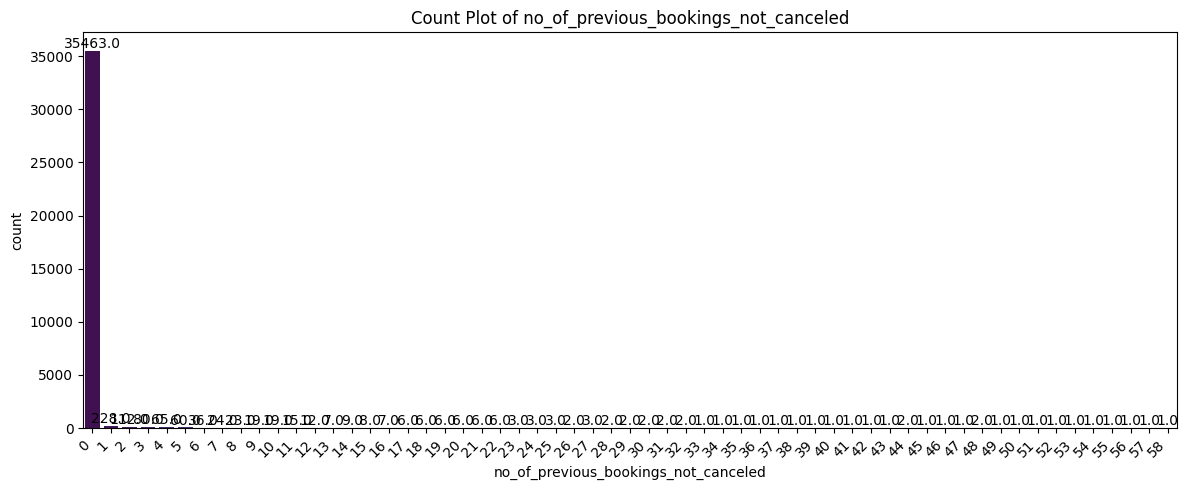

In [90]:
univariate_analysis_categorical(data, 'no_of_previous_bookings_not_canceled')

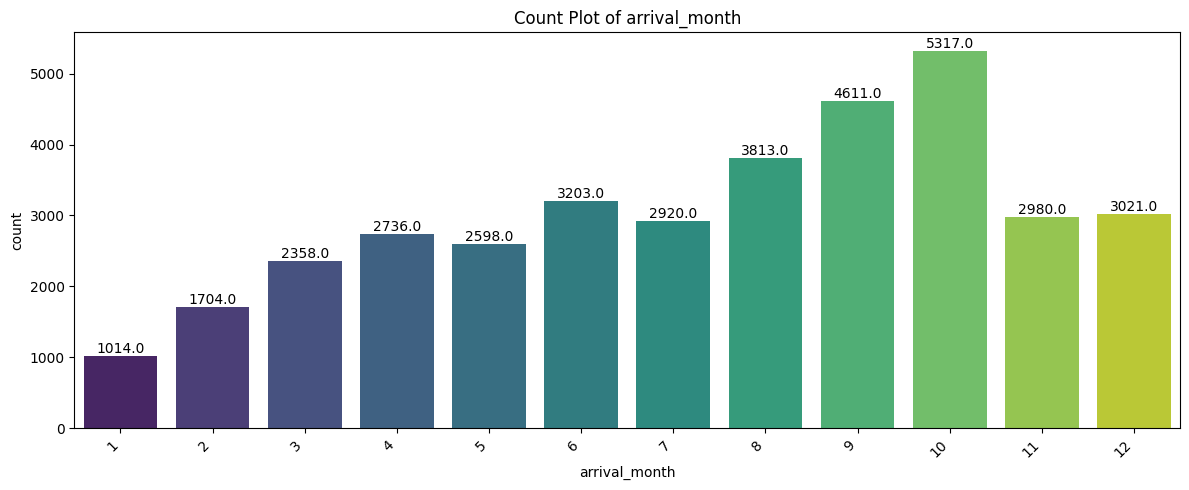

In [92]:
univariate_analysis_categorical(data, 'arrival_month')

* The busiest months are october September and August in that order from the busiest to the least busiest
* January is the least busy month with less al ittle over 1000 arrivals every

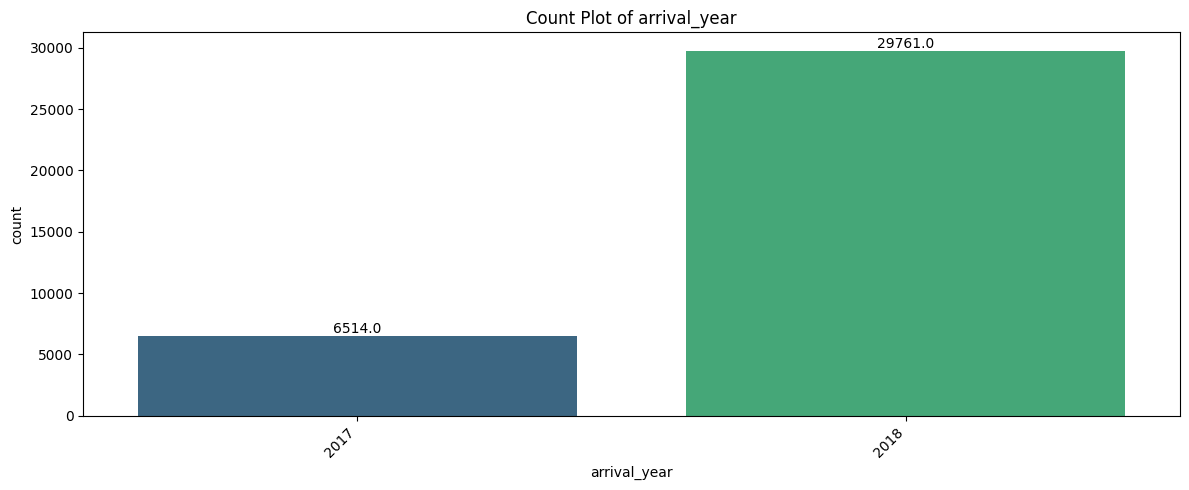

In [93]:
univariate_analysis_categorical(data, 'arrival_year')

* Of the two years in the data, 2018 was the busiest with four(4) times the number of visits in 2017

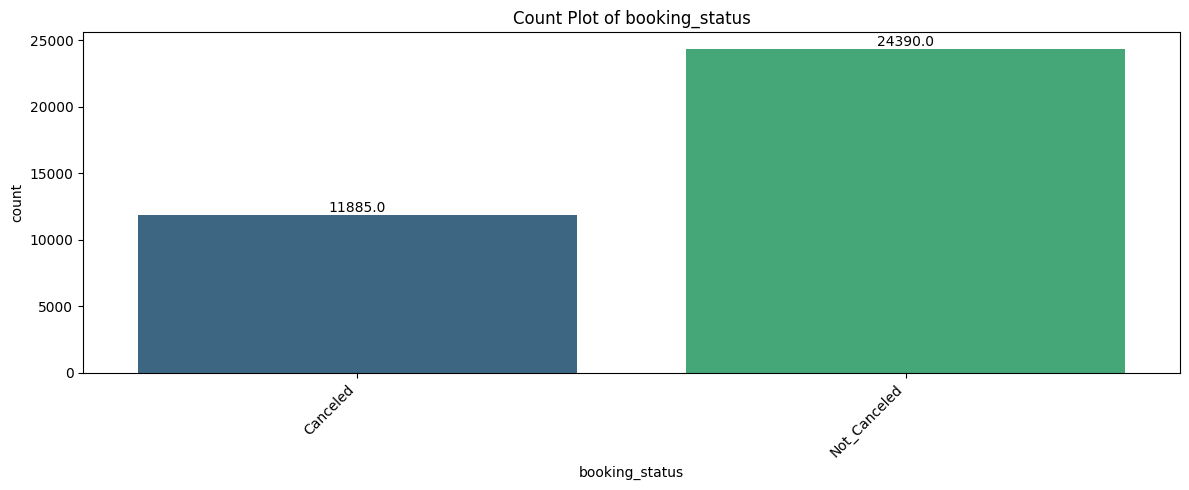

In [94]:
univariate_analysis_categorical(data, 'booking_status')

* The not cancelled visits are more than the canceled ones
* There is a data imbalance  

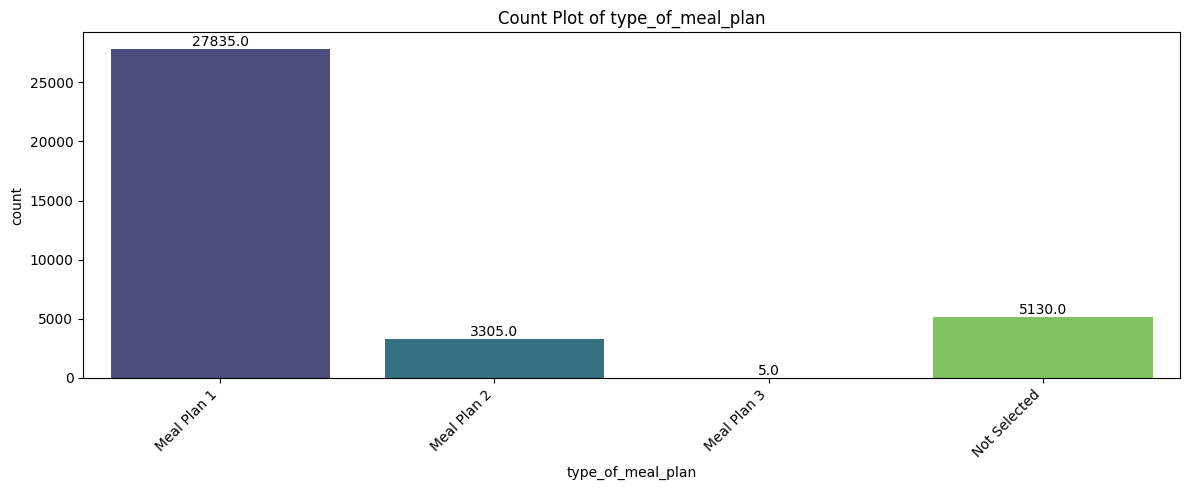

In [95]:
univariate_analysis_categorical(data, 'type_of_meal_plan')

* Meal plan 1 is the most preferred one
* A goo dnumber of clients did not select the type of meal plan
* Meal plan 3 is the least preffered with 5 visitors selecting it in the 2 years

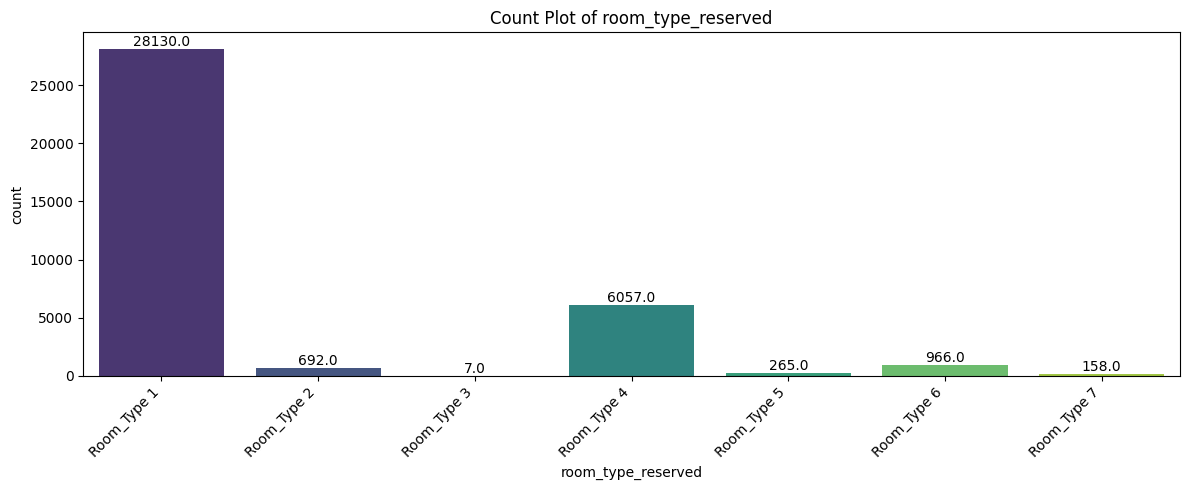

In [96]:
univariate_analysis_categorical(data, 'room_type_reserved')

* Room type 1 is the most prefered and room type 3 is the least prefered in all reservations

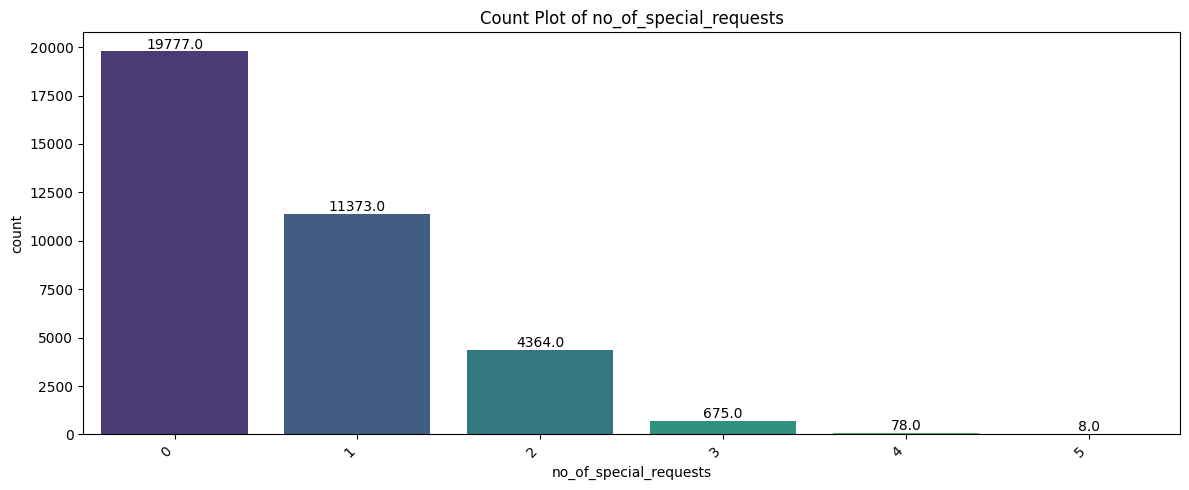

In [97]:
univariate_analysis_categorical(data, 'no_of_special_requests')

* Most guests did not have any special requests when making reservations
* On those that made requests a lot of them made 1 requests more than the rest of the number of requests

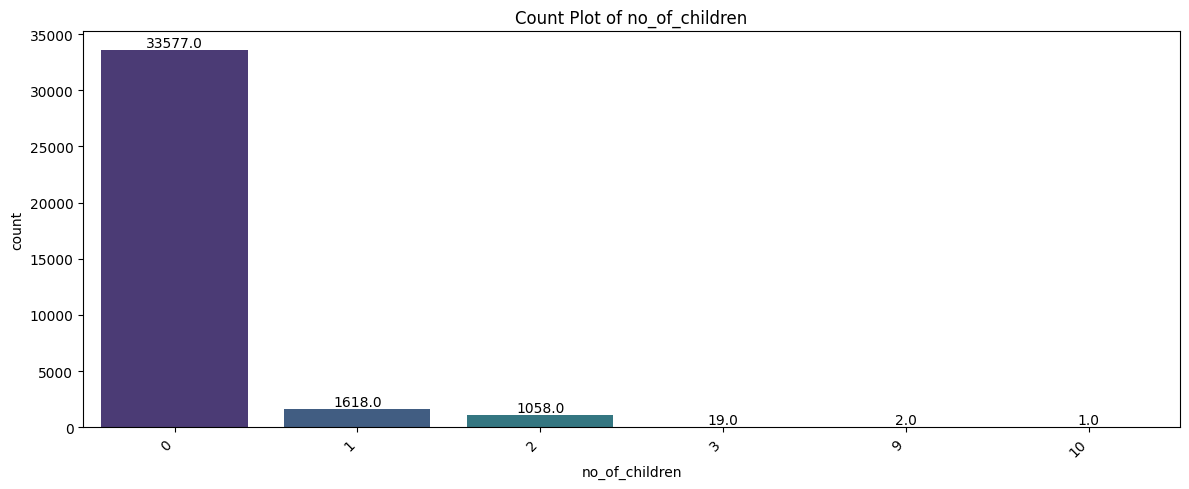

In [98]:
univariate_analysis_categorical(data, 'no_of_children')

* Most reservations did not have children
* On those reservations that had children most of them had 1 and 2 children and the
* One reservation had 10 children and another 2 had 9 children, which might have been a school tour maybe

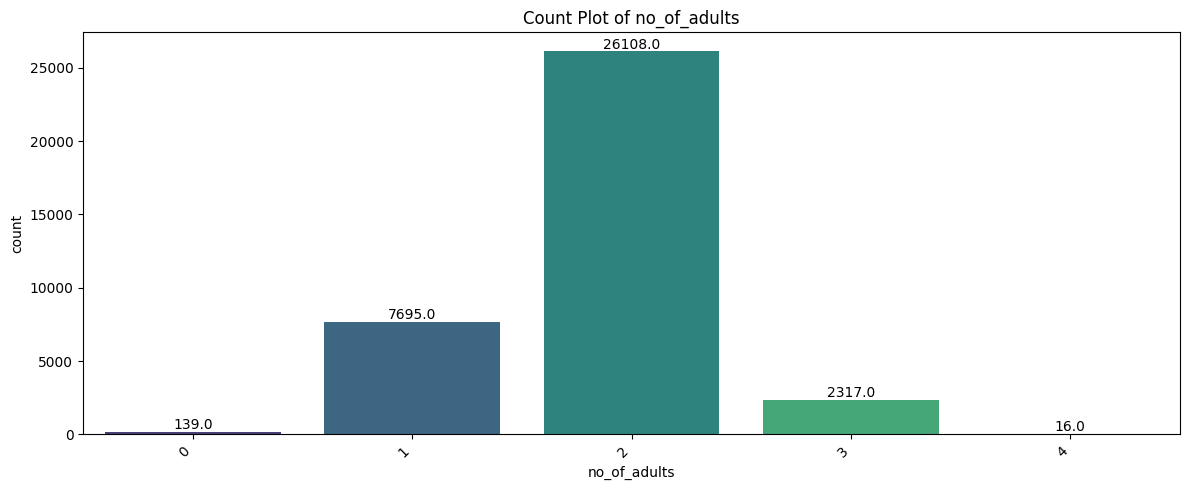

In [99]:
univariate_analysis_categorical(data, 'no_of_adults')

* The most frequent reservations had 2 adults making a reservations which could mean that couples made more reservations or people preferred to share rooms to save costs
* **Surprisingly 139 reservations had no parents and we are yet to find an explanation why it is like that**
* Other reservations had 1, 3 and 4 adults

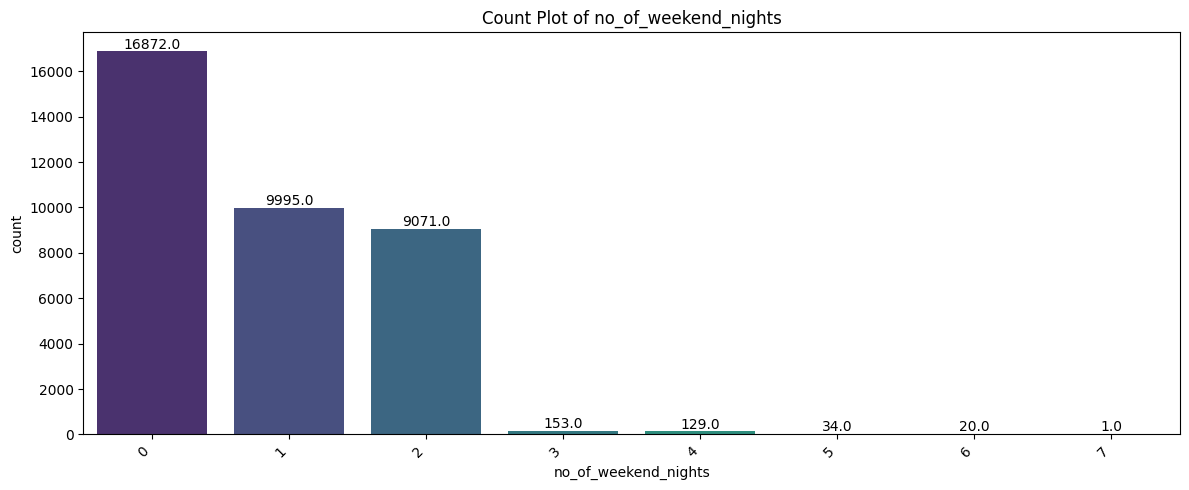

In [100]:
univariate_analysis_categorical(data, 'no_of_weekend_nights')

* Most of the reservations were not made during the weekend
* Those that had weekend nights most had 1 weekend night, then 2 weekend nights and 7 weekend nights had the least reservations

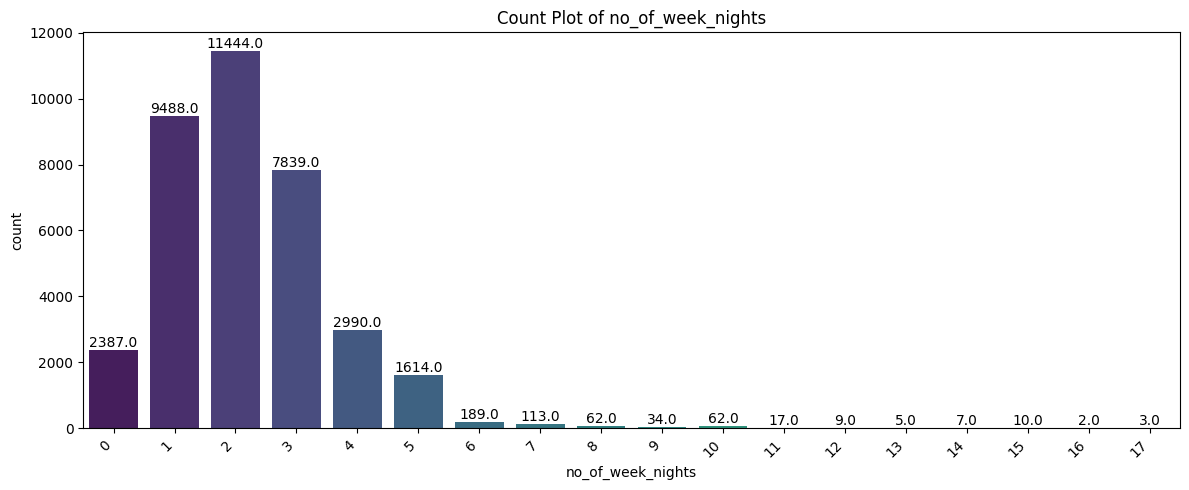

In [101]:
univariate_analysis_categorical(data, 'no_of_week_nights')

* Most reservations were made with 2 week nights, then 1 and then 3 as the top 3
* Some reservations had 0 week days reserved, which meant they were entirely weekend reservations

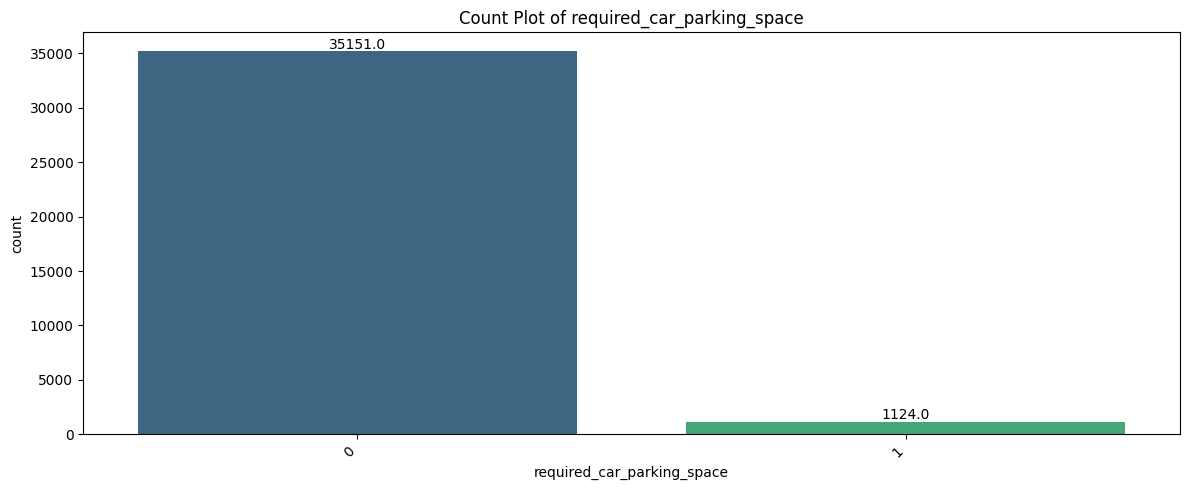

In [102]:
univariate_analysis_categorical(data, 'required_car_parking_space')

* More than 90% of the reservations did not require a parking space
* This also shows an imblanace in the, this variable might not be useable in our analysis

### Bivariate Analysis

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

### K-Nearest Neighbor

###Naive Bayes

### Support Vector Machine

## Model Performance Improvement

Tune the models built in the Model Building section

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Recommendations

### Insights

### Business Recommendations